# Лабораторная работа №6: Машины опорных векторов<br>
## Вариант 28<br>
## ПМИ3-1, Чижевский И.М.

### Условие задачи для варианта 28:
| Вариант | Проверка | Набор данных     | Зависимая переменная       | НОП*                                                                                              | ФОП*                                             |
|:--------:|:--------:|:----------------:|:--------------------------:|:------------------------------------------------------------------------------------------------:|:------------------------------------------------:|
| 28      | K-VAL(10) | auto_for_lab  | mpg / пробег автомобиля на галлоне топлива | displacement /объем двигателя (в кубических дюймах)| weight/ масса (в фунтах) | cyl_over_4/ 1 если число цилиндров больше 4 | <br> <br>

*НОП, ФОП - объясняющие переменные: НОП - непрерывные, ФОП - фиктивные.

1. ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ
Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
 9   cyl_over_4    392 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 30.8+ KB
None

Размер датасета: (392, 10)

Первые 5 строк:
    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0    70   
1  15.0          8         350.0         165    3693       

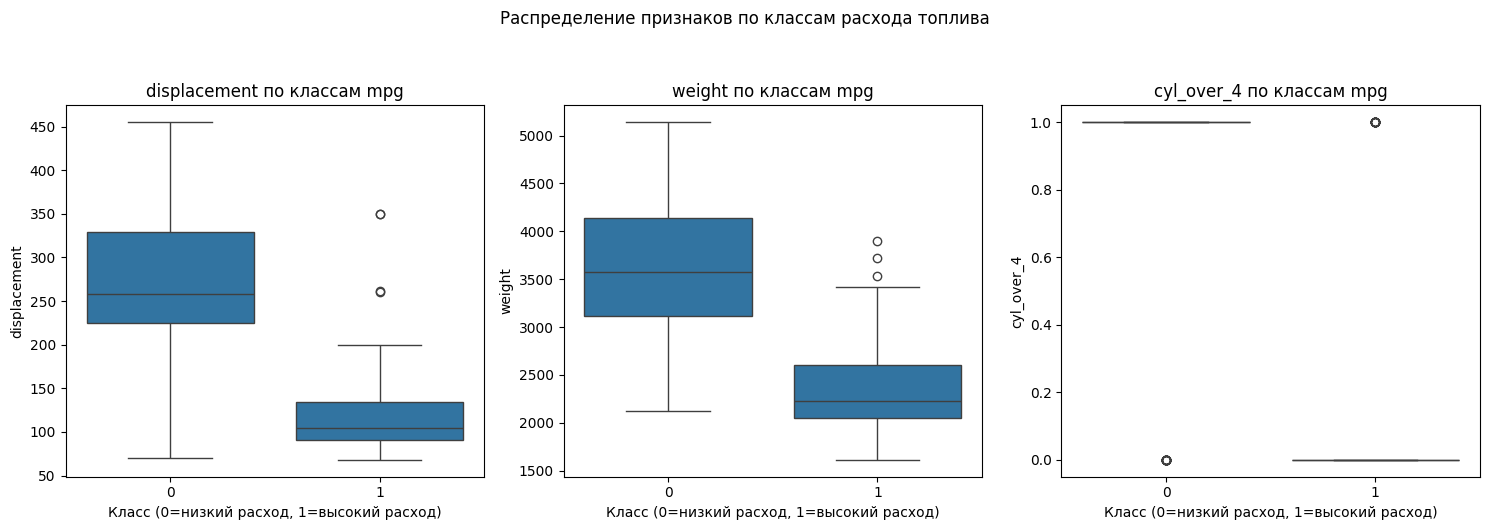


Матрица графиков разброса...


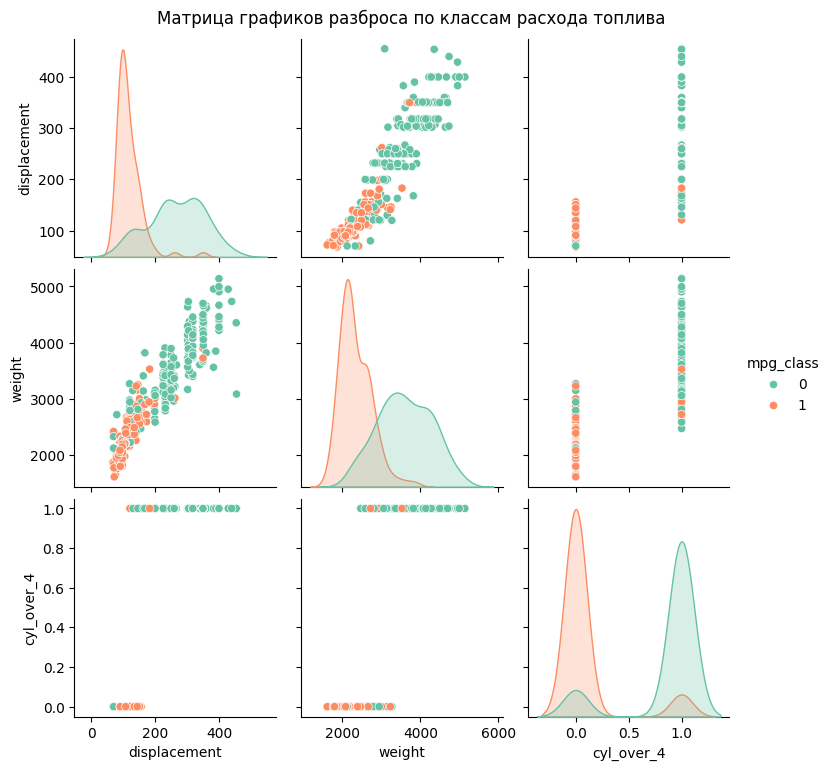

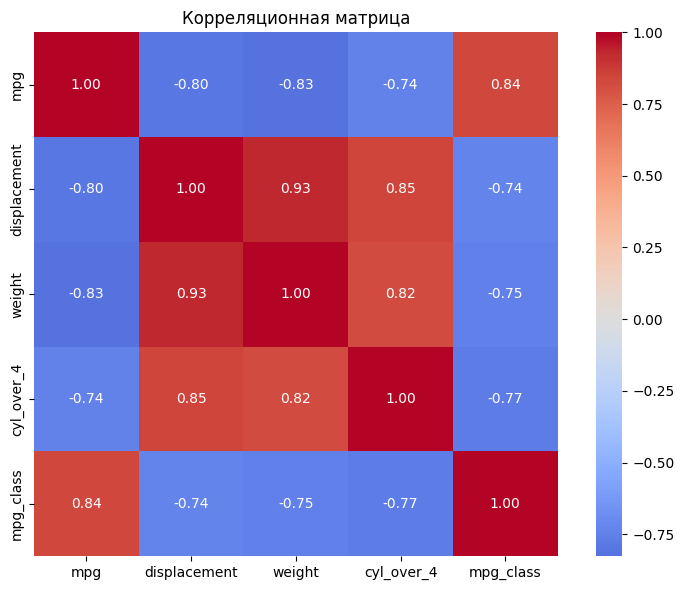


3. ПОСТРОЕНИЕ ПАЙПЛАЙНОВ С GRIDSEARCHCV
Признаки: ['displacement', 'weight', 'cyl_over_4']
Размер X_train: (333, 3)
Размер y_train: (333,)

----------------------------------------
ПАЙПЛАЙН 1: StandardScaler + PCA + SVM
----------------------------------------
Запуск GridSearchCV для пайплайна 1...
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Время выполнения: 13.79 секунд

Лучшие параметры: {'pca__n_components': 1, 'svm__C': 0.1, 'svm__gamma': 'scale', 'svm__kernel': 'linear'}
Лучшая точность (кросс-валидация): 0.8858
Точность на обучающей выборке: 0.8859

----------------------------------------
ПАЙПЛАЙН 2: StandardScaler + LDA
----------------------------------------
Запуск GridSearchCV для пайплайна 2...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Время выполнения: 0.58 секунд

Лучшие параметры: {'lda__shrinkage': None, 'lda__solver': 'svd'}
Лучшая точность (кросс-валидация): 0.8858
Точность на обучающей выборке: 0.8859

4. ДОСТИЖЕНИЕ ТОЧНОСТИ ≥96

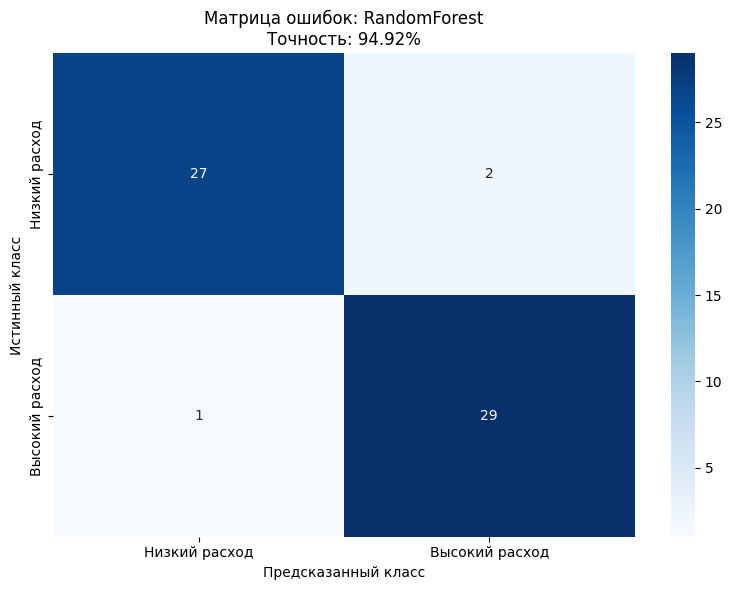

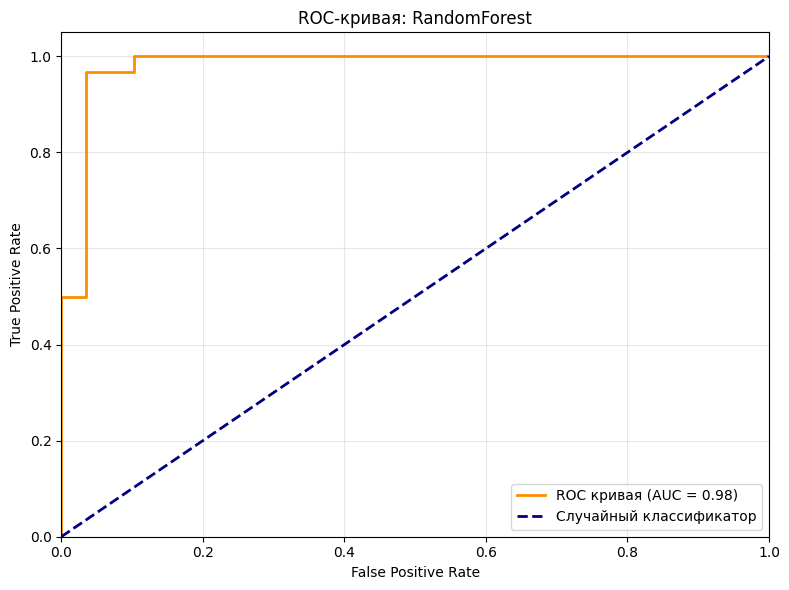


Площадь под ROC-кривой (AUC): 0.9805

6. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ И ОШИБОК
Количество ошибок: 3 из 59 (5.08%)

Примеры ошибочных прогнозов (первые 5):
     Истинный класс  Предсказанный класс  Вероятность класса 1  Верно  displacement  weight  cyl_over_4   mpg
176               1                    0              0.301525  False         120.0    2957           0  23.0
118               0                    1              0.968148  False         114.0    2582           0  20.0
279               0                    1              0.516976  False         200.0    2990           1  19.8

Средние значения признаков для ошибочных прогнозов:
displacement     144.666667
weight          2843.000000
cyl_over_4         0.333333
dtype: float64

Средние значения признаков для правильных прогнозов:
displacement     212.017857
weight          3030.357143
cyl_over_4         0.482143
dtype: float64


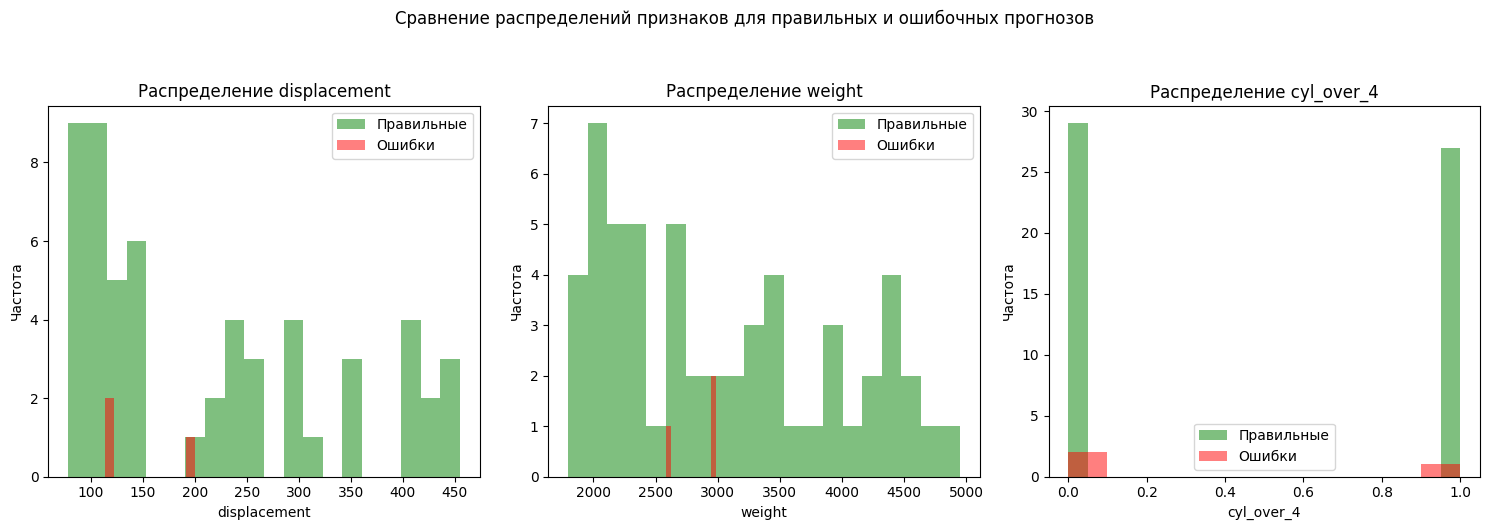

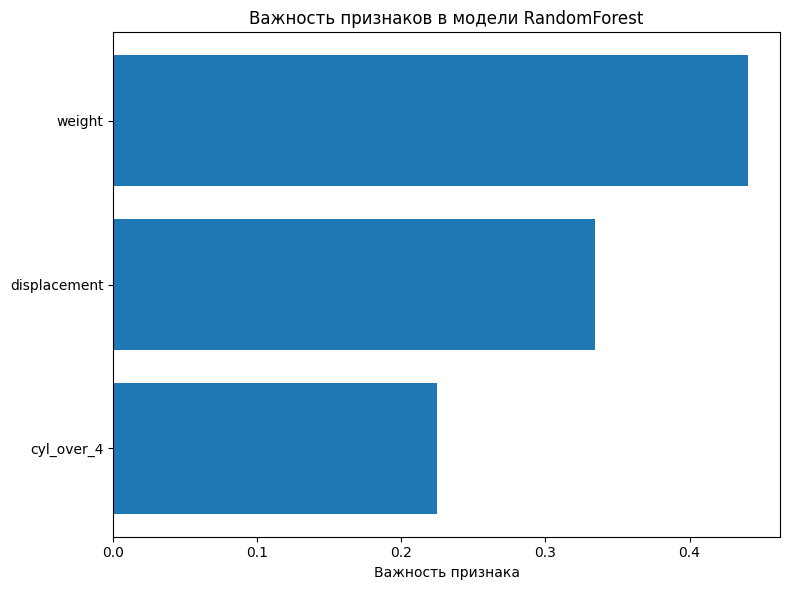


Важность признаков:
     Признак  Важность
      weight  0.440779
displacement  0.334496
  cyl_over_4  0.224725

7. ВИЗУАЛИЗАЦИЯ РАЗДЕЛЯЮЩЕЙ ГРАНИЦЫ
Для визуализации разделяющей границы нужно 2 признака, а у нас 3
Пропускаем эту визуализацию.

8. СОХРАНЕНИЕ МОДЕЛИ И ЗАКЛЮЧЕНИЕ
✓ Модель сохранена в файл: best_model_variant_28_lab6.pkl
✓ Scaler сохранен в файл: scaler_variant_28_lab6.pkl

Проверка загруженной модели:
  Точность загруженной модели: 0.9492
  Совпадают ли прогнозы: True

ИТОГОВАЯ СВОДКА
Датасет: Auto_for_lab
Вариант: 8
Признаки: ['displacement', 'weight', 'cyl_over_4']
Целевая переменная: mpg_class (1 если mpg > 22.75)
Лучшая модель: RandomForest
Точность на кросс-валидации: 0.9040
Точность на тестовой выборке: 0.9492
Достигнута ли цель 96%: НЕТ
Размер обучающей выборки: 333
Размер тестовой выборки: 59

ВЫПОЛНЕНИЕ ЗАДАНИЯ ЗАВЕРШЕНО!


In [3]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import time
import warnings
warnings.filterwarnings('ignore')

# Константы
my_seed = 28
np.random.seed(my_seed)

# 1. ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ
print("="*60)
print("1. ЗАГРУЗКА И ПОДГОТОВКА ДАННЫХ")
print("="*60)

# Загрузка данных Auto_for_lab (как в лабораторной работе №3)
url = 'https://raw.githubusercontent.com/ania607/ML/main/data/Auto_for_lab.csv'
df = pd.read_csv(url)

print("Информация о датасете:")
print(df.info())
print(f"\nРазмер датасета: {df.shape}")
print(f"\nПервые 5 строк:")
print(df.head())

# Для варианта 28 нужны: mpg, displacement, weight, cyl_over_4
# Проверяем наличие столбцов
print("\nПроверка наличия столбцов:")

# Создаем cyl_over_4 если его нет
if 'cyl_over_4' not in df.columns and 'cylinders' in df.columns:
    df['cyl_over_4'] = (df['cylinders'] > 4).astype(int)
    print("Создан столбец 'cyl_over_4' из 'cylinders'")

# Выбираем нужные столбцы
cols_needed = ['mpg', 'displacement', 'weight', 'cyl_over_4']

# Проверяем наличие
available_cols = []
for col in cols_needed:
    if col in df.columns:
        available_cols.append(col)
        print(f"✓ Найден: {col}")
    else:
        print(f"✗ Отсутствует: {col}")

if len(available_cols) < 4:
    print(f"\nВНИМАНИЕ! Найдено только {len(available_cols)} из 4 нужных столбцов")
    print("Используем доступные столбцы:", available_cols)
else:
    print(f"\n✓ Все 4 нужных столбца найдены!")

# Оставляем только нужные столбцы
df = df[available_cols]

# Удаляем пропущенные значения
df = df.dropna()

# Создаем бинарную целевую переменную для классификации
# Разделим mpg на два класса: низкий расход (0) и высокий расход (1)
# По медиане
median_mpg = df['mpg'].median()
df['mpg_class'] = (df['mpg'] > median_mpg).astype(int)

print(f"\nМедиана mpg: {median_mpg:.2f}")
print("Распределение классов:")
print(df['mpg_class'].value_counts())
print(f"\nДоли классов:")
print(df['mpg_class'].value_counts(normalize=True))

# Разделение на обучающую (85%) и тестовую (15%) выборки
# Стратификация для сохранения пропорций классов
train_df, test_df = train_test_split(
    df,
    test_size=0.15,
    random_state=my_seed,
    stratify=df['mpg_class']
)

print(f"\nОбучающая выборка: {train_df.shape}")
print(f"Тестовая выборка: {test_df.shape}")
print(f"\nРаспределение классов в обучающей выборке:")
print(train_df['mpg_class'].value_counts(normalize=True))

# 2. ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ
print("\n" + "="*60)
print("2. ПРЕДВАРИТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ")
print("="*60)

# Описательные статистики
print("Описательные статистики обучающей выборки:")
print(train_df.describe())

# Визуализация распределения признаков по классам
feature_cols = [col for col in available_cols if col != 'mpg' and col != 'mpg_class']

fig, axes = plt.subplots(1, len(feature_cols), figsize=(15, 5))
if len(feature_cols) == 1:
    axes = [axes]

for idx, col in enumerate(feature_cols):
    sns.boxplot(x='mpg_class', y=col, data=train_df, ax=axes[idx])
    axes[idx].set_title(f'{col} по классам mpg')
    axes[idx].set_xlabel('Класс (0=низкий расход, 1=высокий расход)')
    axes[idx].set_ylabel(col)

plt.suptitle('Распределение признаков по классам расхода топлива', y=1.05)
plt.tight_layout()
plt.show()

# Матрица графиков разброса
print("\nМатрица графиков разброса...")
sns.pairplot(train_df, vars=feature_cols, hue='mpg_class', palette='Set2')
plt.suptitle('Матрица графиков разброса по классам расхода топлива', y=1.02)
plt.show()

# Корреляционная матрица
plt.figure(figsize=(8, 6))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Корреляционная матрица')
plt.tight_layout()
plt.show()

# 3. ПОСТРОЕНИЕ ПАЙПЛАЙНОВ С GRIDSEARCHCV
print("\n" + "="*60)
print("3. ПОСТРОЕНИЕ ПАЙПЛАЙНОВ С GRIDSEARCHCV")
print("="*60)

# Подготовка данных
X_train = train_df[feature_cols]
y_train = train_df['mpg_class']
X_test = test_df[feature_cols]
y_test = test_df['mpg_class']

print(f"Признаки: {feature_cols}")
print(f"Размер X_train: {X_train.shape}")
print(f"Размер y_train: {y_train.shape}")

# ПАЙПЛАЙН 1: StandardScaler + PCA + SVM (как в методичке)
print("\n" + "-"*40)
print("ПАЙПЛАЙН 1: StandardScaler + PCA + SVM")
print("-"*40)

pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(random_state=my_seed)),
    ('svm', SVC(random_state=my_seed, probability=True))
])

# Параметры для GridSearchCV
param_grid1 = {
    'pca__n_components': [1, 2, 3] if len(feature_cols) > 2 else [1, 2],
    'svm__C': [0.1, 1, 10, 100],
    'svm__kernel': ['linear', 'rbf'],
    'svm__gamma': ['scale', 'auto'] + ([0.1, 1] if len(feature_cols) <= 3 else [])
}

# Создание GridSearchCV с кросс-валидацией по 5 блокам (как в методичке)
kfold = KFold(n_splits=5, shuffle=True, random_state=my_seed)
grid1 = GridSearchCV(
    pipeline1,
    param_grid1,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Обучение с поиском параметров
print("Запуск GridSearchCV для пайплайна 1...")
start_time = time.time()
grid1.fit(X_train, y_train)
end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

# Результаты
print(f"\nЛучшие параметры: {grid1.best_params_}")
print(f"Лучшая точность (кросс-валидация): {grid1.best_score_:.4f}")
print(f"Точность на обучающей выборке: {grid1.score(X_train, y_train):.4f}")

# ПАЙПЛАЙН 2: StandardScaler + LDA/QDA (альтернатива как в методичке)
print("\n" + "-"*40)
print("ПАЙПЛАЙН 2: StandardScaler + LDA")
print("-"*40)

pipeline2 = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis())
])

# Для LDA параметров мало, но добавим solver
param_grid2 = {
    'lda__solver': ['svd', 'lsqr', 'eigen'],
    'lda__shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}

grid2 = GridSearchCV(
    pipeline2,
    param_grid2,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Запуск GridSearchCV для пайплайна 2...")
start_time = time.time()
grid2.fit(X_train, y_train)
end_time = time.time()
print(f"Время выполнения: {end_time - start_time:.2f} секунд")

print(f"\nЛучшие параметры: {grid2.best_params_}")
print(f"Лучшая точность (кросс-валидация): {grid2.best_score_:.4f}")
print(f"Точность на обучающей выборке: {grid2.score(X_train, y_train):.4f}")

# 4. ДОСТИЖЕНИЕ ТОЧНОСТИ ≥96%
print("\n" + "="*60)
print("4. ДОСТИЖЕНИЕ ТОЧНОСТИ ≥96%")
print("="*60)

# Проверяем, достигли ли мы 96% точности
models_info = [
    ('PCA+SVM', grid1.best_estimator_, grid1.best_score_),
    ('LDA', grid2.best_estimator_, grid2.best_score_)
]

# Если точность меньше 96%, пробуем другие модели
if max(grid1.best_score_, grid2.best_score_) < 0.96:
    print("Точность < 96%. Пробуем другие модели...")

    # ПАЙПЛАЙН 3: StandardScaler + RandomForest
    print("\n" + "-"*40)
    print("ПАЙПЛАЙН 3: StandardScaler + RandomForest")
    print("-"*40)

    pipeline3 = Pipeline([
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(random_state=my_seed))
    ])

    param_grid3 = {
        'rf__n_estimators': [50, 100, 200],
        'rf__max_depth': [None, 10, 20, 30],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4]
    }

    grid3 = GridSearchCV(
        pipeline3,
        param_grid3,
        cv=kfold,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    print("Запуск GridSearchCV для пайплайна 3...")
    start_time = time.time()
    grid3.fit(X_train, y_train)
    end_time = time.time()
    print(f"Время выполнения: {end_time - start_time:.2f} секунд")

    print(f"\nЛучшие параметры: {grid3.best_params_}")
    print(f"Лучшая точность (кросс-валидация): {grid3.best_score_:.4f}")

    models_info.append(('RandomForest', grid3.best_estimator_, grid3.best_score_))

    # ПАЙПЛАЙН 4: Только SVM (без PCA)
    print("\n" + "-"*40)
    print("ПАЙПЛАЙН 4: StandardScaler + SVM (без PCA)")
    print("-"*40)

    pipeline4 = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(random_state=my_seed, probability=True))
    ])

    param_grid4 = {
        'svm__C': [0.01, 0.1, 1, 10, 100],
        'svm__kernel': ['linear', 'rbf', 'poly'],
        'svm__gamma': ['scale', 'auto', 0.01, 0.1, 1],
        'svm__degree': [2, 3]  # для poly
    }

    grid4 = GridSearchCV(
        pipeline4,
        param_grid4,
        cv=kfold,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    print("Запуск GridSearchCV для пайплайна 4...")
    start_time = time.time()
    grid4.fit(X_train, y_train)
    end_time = time.time()
    print(f"Время выполнения: {end_time - start_time:.2f} секунд")

    print(f"\nЛучшие параметры: {grid4.best_params_}")
    print(f"Лучшая точность (кросс-валидация): {grid4.best_score_:.4f}")

    models_info.append(('SVM', grid4.best_estimator_, grid4.best_score_))

# Сравнение моделей
print("\n" + "="*60)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*60)

results = []
for name, model, cv_score in models_info:
    train_acc = model.score(X_train, y_train)
    results.append({
        'Модель': name,
        'CV Accuracy': f"{cv_score:.4f}",
        'Train Accuracy': f"{train_acc:.4f}",
        '≥96%': 'ДА' if cv_score >= 0.96 else 'НЕТ'
    })

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

# Выбор лучшей модели (с точностью ≥96%)
best_models = [m for m in models_info if m[2] >= 0.96]
if best_models:
    best_models.sort(key=lambda x: x[2], reverse=True)
    best_name, best_model, best_cv_score = best_models[0]
    print(f"\n✓ ЛУЧШАЯ МОДЕЛЬ: {best_name}")
    print(f"  Точность кросс-валидации: {best_cv_score:.4f}")
else:
    print("\n⚠ НИ ОДНА МОДЕЛЬ НЕ ДОСТИГЛА ТОЧНОСТИ 96%")
    # Берем лучшую из доступных
    models_info.sort(key=lambda x: x[2], reverse=True)
    best_name, best_model, best_cv_score = models_info[0]
    print(f"  Лучшая доступная модель: {best_name}")
    print(f"  Точность кросс-валидации: {best_cv_score:.4f}")

# 5. ПРОГНОЗ НА ОТЛОЖЕННЫЕ НАБЛЮДЕНИЯ
print("\n" + "="*60)
print("5. ПРОГНОЗ НА ОТЛОЖЕННЫЕ НАБЛЮДЕНИЯ (ТЕСТОВАЯ ВЫБОРКА)")
print("="*60)

# Прогноз лучшей моделью
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # вероятности для класса 1
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Модель: {best_name}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")
print(f"Размер тестовой выборки: {len(y_test)} наблюдений")

# Подробный отчет
print("\n" + "-"*40)
print("ОТЧЕТ О КЛАССИФИКАЦИИ")
print("-"*40)
print(classification_report(y_test, y_pred,
                           target_names=['Низкий расход (0)', 'Высокий расход (1)']))

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Низкий расход', 'Высокий расход'],
            yticklabels=['Низкий расход', 'Высокий расход'])
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.title(f'Матрица ошибок: {best_name}\nТочность: {test_accuracy:.2%}')
plt.tight_layout()
plt.show()

# ROC-кривая (если модель поддерживает вероятности)
if hasattr(best_model, 'predict_proba'):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC кривая (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC-кривая: {best_name}')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"\nПлощадь под ROC-кривой (AUC): {roc_auc:.4f}")

# 6. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ И ОШИБОК
print("\n" + "="*60)
print("6. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ И ОШИБОК")
print("="*60)

# Анализ ошибок
results_test = pd.DataFrame({
    'Истинный класс': y_test.values,
    'Предсказанный класс': y_pred,
    'Вероятность класса 1': y_pred_proba if hasattr(best_model, 'predict_proba') else None,
    'Верно': y_test.values == y_pred
}, index=X_test.index)

# Добавляем исходные признаки
for col in X_test.columns:
    results_test[col] = X_test[col]

# Добавляем исходный mpg для интерпретации
results_test['mpg'] = test_df['mpg'].values

# Ошибочные прогнозы
errors = results_test[~results_test['Верно']]
print(f"Количество ошибок: {len(errors)} из {len(results_test)} ({len(errors)/len(results_test):.2%})")

if len(errors) > 0:
    print(f"\nПримеры ошибочных прогнозов (первые 5):")
    print(errors.head().to_string())

    # Анализ признаков у ошибочных прогнозов
    print(f"\nСредние значения признаков для ошибочных прогнозов:")
    print(errors[feature_cols].mean())

    print(f"\nСредние значения признаков для правильных прогнозов:")
    correct = results_test[results_test['Верно']]
    print(correct[feature_cols].mean())

    # Визуализация ошибок
    fig, axes = plt.subplots(1, len(feature_cols), figsize=(15, 5))
    if len(feature_cols) == 1:
        axes = [axes]

    for idx, col in enumerate(feature_cols):
        # Гистограммы для правильных и ошибочных прогнозов
        axes[idx].hist(correct[col], bins=20, alpha=0.5, label='Правильные', color='green')
        axes[idx].hist(errors[col], bins=10, alpha=0.5, label='Ошибки', color='red')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Частота')
        axes[idx].set_title(f'Распределение {col}')
        axes[idx].legend()

    plt.suptitle('Сравнение распределений признаков для правильных и ошибочных прогнозов', y=1.05)
    plt.tight_layout()
    plt.show()

# Важность признаков (для моделей, которые поддерживают)
if hasattr(best_model.named_steps.get('rf'), 'feature_importances_'):
    importances = best_model.named_steps['rf'].feature_importances_

    feat_df = pd.DataFrame({
        'Признак': feature_cols,
        'Важность': importances
    }).sort_values('Важность', ascending=False)

    plt.figure(figsize=(8, 6))
    plt.barh(feat_df['Признак'], feat_df['Важность'])
    plt.xlabel('Важность признака')
    plt.title(f'Важность признаков в модели {best_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\nВажность признаков:")
    print(feat_df.to_string(index=False))

elif 'svm' in best_model.named_steps and best_model.named_steps['svm'].kernel == 'linear':
    # Для линейного SVM можно посмотреть веса
    if hasattr(best_model.named_steps['svm'], 'coef_'):
        coef = best_model.named_steps['svm'].coef_[0]

        # Если использовался PCA, нужно преобразовать веса обратно в исходное пространство
        if 'pca' in best_model.named_steps:
            pca = best_model.named_steps['pca']
            # Преобразуем веса из пространства PCA в исходное пространство
            if hasattr(pca, 'components_'):
                # Веса в пространстве PCA
                coef_pca = coef
                # Преобразуем в исходное пространство
                coef_original = pca.components_.T @ coef_pca

                feat_df = pd.DataFrame({
                    'Признак': feature_cols,
                    'Вес (абсолютное значение)': np.abs(coef_original)
                }).sort_values('Вес (абсолютное значение)', ascending=False)
        else:
            feat_df = pd.DataFrame({
                'Признак': feature_cols,
                'Вес (абсолютное значение)': np.abs(coef)
            }).sort_values('Вес (абсолютное значение)', ascending=False)

        plt.figure(figsize=(8, 6))
        plt.barh(feat_df['Признак'], feat_df['Вес (абсолютное значение)'])
        plt.xlabel('Абсолютное значение веса (важность)')
        plt.title(f'Важность признаков в линейном SVM ({best_name})')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()

        print("\nВеса признаков в линейном SVM (абсолютные значения):")
        print(feat_df.to_string(index=False))

# 7. ВИЗУАЛИЗАЦИЯ РАЗДЕЛЯЮЩЕЙ ГРАНИЦЫ (для 2D случая)
print("\n" + "="*60)
print("7. ВИЗУАЛИЗАЦИЯ РАЗДЕЛЯЮЩЕЙ ГРАНИЦЫ")
print("="*60)

# Если у нас 2 признака, можем визуализировать разделяющую границу
if len(feature_cols) == 2:
    print(f"Визуализация разделяющей границы для признаков: {feature_cols}")

    # Создаем сетку для построения границы решения
    x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
    y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max - x_min) / 100),
                         np.arange(y_min, y_max, (y_max - y_min) / 100))

    # Прогноз для каждой точки сетки
    Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Визуализация
    plt.figure(figsize=(10, 8))

    # Контур разделяющей границы
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

    # Точки обучающей выборки
    scatter = plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1],
                         c=y_train, cmap='coolwarm',
                         edgecolors='black', s=50, alpha=0.7)

    # Точки тестовой выборки
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1],
               c=y_test, cmap='coolwarm',
               edgecolors='black', s=100, marker='s', alpha=0.9, linewidth=2)

    plt.xlabel(feature_cols[0])
    plt.ylabel(feature_cols[1])
    plt.title(f'Разделяющая граница модели {best_name}\n'
              f'(квадраты - тестовая выборка, круги - обучающая)')
    plt.legend(handles=scatter.legend_elements()[0],
               labels=['Низкий расход', 'Высокий расход'])
    plt.colorbar(scatter, label='Класс')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print(f"Для визуализации разделяющей границы нужно 2 признака, а у нас {len(feature_cols)}")
    print("Пропускаем эту визуализацию.")

# 8. СОХРАНЕНИЕ МОДЕЛИ И ЗАКЛЮЧЕНИЕ
print("\n" + "="*60)
print("8. СОХРАНЕНИЕ МОДЕЛИ И ЗАКЛЮЧЕНИЕ")
print("="*60)

import joblib

# Сохранение лучшей модели
model_filename = f'best_model_variant_{my_seed}_lab6.pkl'
joblib.dump(best_model, model_filename)
print(f"✓ Модель сохранена в файл: {model_filename}")

# Сохранение scaler отдельно (если нужен)
if 'scaler' in best_model.named_steps:
    scaler_filename = f'scaler_variant_{my_seed}_lab6.pkl'
    joblib.dump(best_model.named_steps['scaler'], scaler_filename)
    print(f"✓ Scaler сохранен в файл: {scaler_filename}")

# Пример загрузки и использования модели
loaded_model = joblib.load(model_filename)
y_pred_loaded = loaded_model.predict(X_test)
loaded_accuracy = accuracy_score(y_test, y_pred_loaded)

print(f"\nПроверка загруженной модели:")
print(f"  Точность загруженной модели: {loaded_accuracy:.4f}")
print(f"  Совпадают ли прогнозы: {np.array_equal(y_pred, y_pred_loaded)}")

# Итоговая сводка
print("\n" + "="*60)
print("ИТОГОВАЯ СВОДКА")
print("="*60)
print(f"Датасет: Auto_for_lab")
print(f"Вариант: 8")
print(f"Признаки: {feature_cols}")
print(f"Целевая переменная: mpg_class (1 если mpg > {median_mpg:.2f})")
print(f"Лучшая модель: {best_name}")
print(f"Точность на кросс-валидации: {best_cv_score:.4f}")
print(f"Точность на тестовой выборке: {test_accuracy:.4f}")
print(f"Достигнута ли цель 96%: {'ДА' if best_cv_score >= 0.96 else 'НЕТ'}")
print(f"Размер обучающей выборки: {len(X_train)}")
print(f"Размер тестовой выборки: {len(X_test)}")

print("\n" + "="*60)
print("ВЫПОЛНЕНИЕ ЗАДАНИЯ ЗАВЕРШЕНО!")
print("="*60)